In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from explore_data import get_data


data = get_data()
# sort by date
data = data.sort_values(by="date")

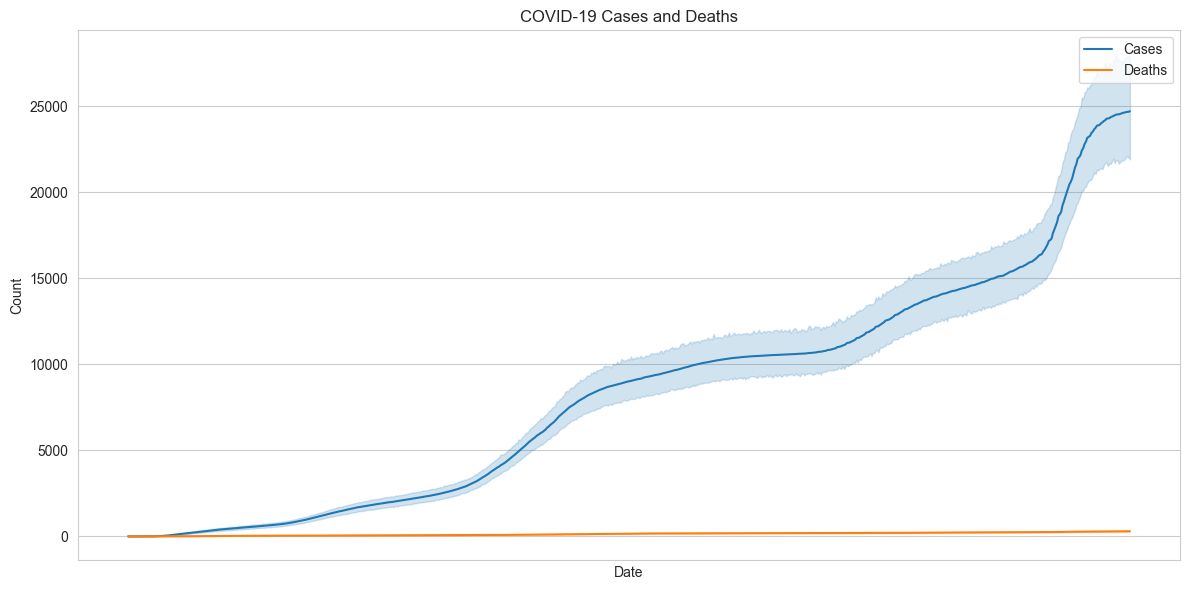

In [11]:
# Create a line chart using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="cases", data=data, label="Cases")
sns.lineplot(x="date", y="death", data=data, label="Deaths")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Cases and Deaths")
plt.legend()
plt.grid(True)

# Show the plot
# Remove date labels from the x-axis
plt.xticks([])
plt.tight_layout()
plt.show()

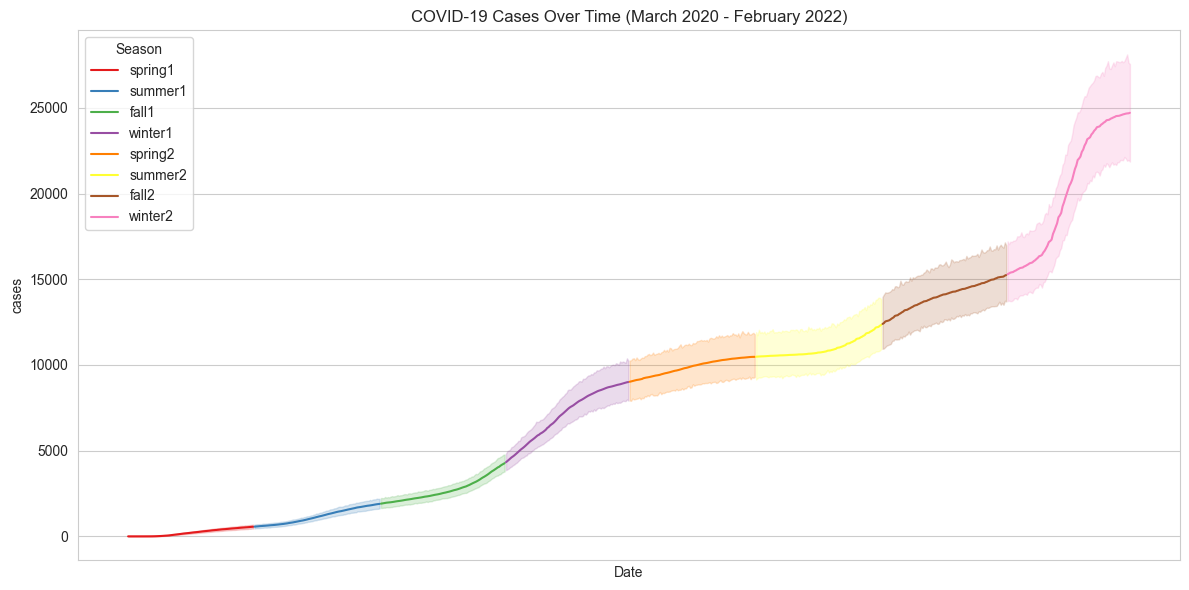

In [12]:
# Create a line chart using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="cases", data=data, hue="season", palette="Set1", markers=True)
plt.xlabel("Date")
plt.ylabel("cases")
plt.title("COVID-19 Cases Over Time (March 2020 - February 2022)")
plt.legend(title="Season")
plt.grid(True)

# Show the plot
# Remove date labels from the x-axis
plt.xticks([])
plt.tight_layout()
plt.show()

In [3]:
df = data.copy()
# use only most cases in each state
df = df.sort_values(by="cases", ascending=False)
df = df.drop_duplicates(subset="state", keep="first")
df

,id,date,state,abbr,location,cases,death,season
2095556,CA0788990,2022-02-28,California,CA,Los Angeles,2796560,30716,winter2
2253695,AZ2033544,2022-02-27,Arizona,AZ,Maricopa,1246178,15761,winter2
2093915,FL0775442,2022-02-26,Florida,FL,Miami-Dade,1176706,10320,winter2
2130825,IL1007896,2022-02-28,Illinois,IL,Cook,1111190,14051,winter2
2301340,TX2401336,2022-02-28,Texas,TX,Harris,992400,10667,winter2
2060036,NY0375052,2022-02-28,New York,NY,Kings,685853,12694,winter2
2221326,NV1772909,2022-02-28,Nevada,NV,Clark,511021,7479,winter2
2021602,MI0087701,2022-02-28,Michigan,MI,Wayne,392673,7631,winter2
2060071,WA0375092,2022-02-28,Washington,WA,King,365871,2530,winter2
2162106,UT1287149,2022-02-28,Utah,UT,Salt Lake,339132,1543,winter2


In [4]:
# Load the GeoJSON data
gdf = gpd.read_file("data/us-states_500k.geojson")
# i dont want alaska and hawaii
gdf = gdf[gdf["NAME"].isin(["Alaska", "Hawaii", "Puerto Rico"]) == False]
gdf.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


/var/folders/_4/g5xpssk967q4bq693_37t2yw0000gn/T/ipykernel_27432/2220435313.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, abbr in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['abbr']):


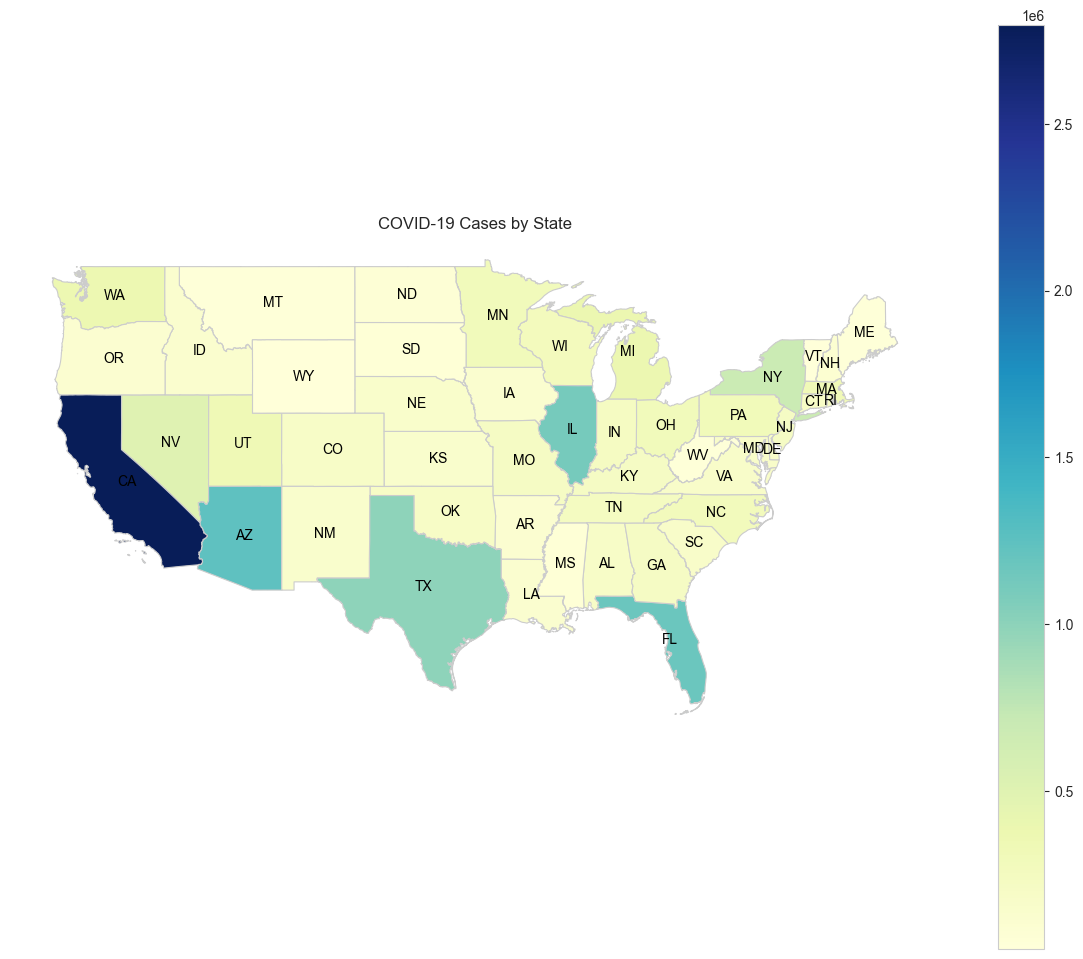

In [10]:
# Load the GeoJSON data
merged = gdf.merge(df, left_on="NAME", right_on="state")

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
merged.plot(
    column="cases", cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True
)

# Add state abbreviation labels
for x, y, abbr in zip(
    merged.geometry.centroid.x, merged.geometry.centroid.y, merged["abbr"]
):
    ax.text(x, y, abbr, fontsize=10, ha="center", va="center", color="black")

plt.title("COVID-19 Cases by State")
plt.axis("off")
plt.savefig("data/covid19_cases_by_state.png", dpi=300)
plt.show()

/var/folders/_4/g5xpssk967q4bq693_37t2yw0000gn/T/ipykernel_27432/2258165223.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, abbr in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['abbr']):


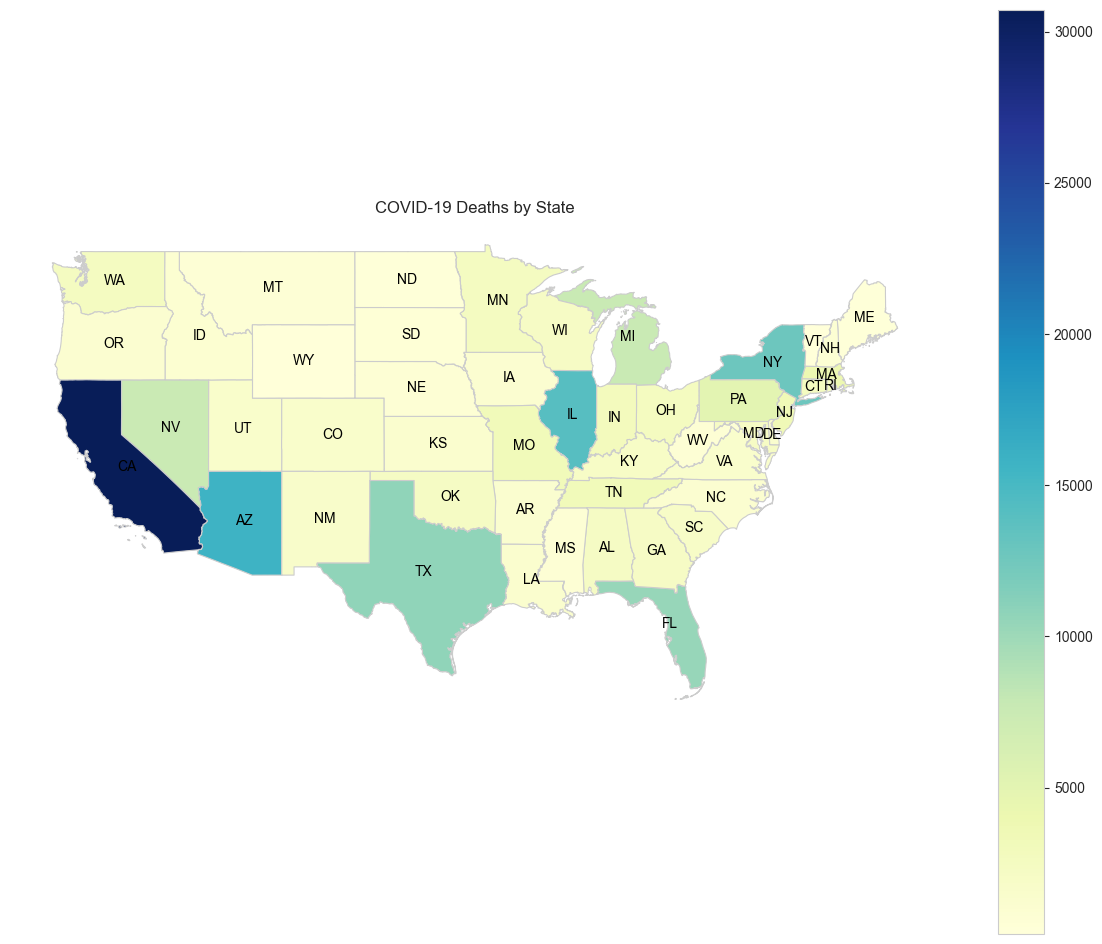

In [11]:
# Load the GeoJSON data
merged = gdf.merge(df, left_on="NAME", right_on="state")

# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
merged.plot(
    column="death", cmap="YlGnBu", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True
)

# Add state abbreviation labels
for x, y, abbr in zip(
    merged.geometry.centroid.x, merged.geometry.centroid.y, merged["abbr"]
):
    ax.text(x, y, abbr, fontsize=10, ha="center", va="center", color="black")

plt.title("COVID-19 Deaths by State")
plt.axis("off")
plt.savefig("data/covid19_deaths_by_state.png", dpi=300)
plt.show()